In [ ]:
import Pkg;
Pkg.add("ModelingToolkit")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

In [5]:
using ModelingToolkit, DifferentialEquations, Plots

In [7]:
# Define our state variables: state(t) = initial condition
@variables t x(t)=1 y(t)=1 z(t)=2

4-element Vector{Num}:
    t
 x(t)
 y(t)
 z(t)

In [16]:
# Define our parameters
@parameters α=1.5 β=1.0 γ=3.0 δ=1.0

4-element Vector{Num}:
 α
 β
 γ
 δ

In [19]:
# Define our differential: takes the derivative with respect to `t`
D = Differential(t)

# Define the differential equations
eqs = [D(x) ~ α * x - β * x * y
       D(y) ~ -γ * y + δ * x * y
       z ~ x + y]

3-element Vector{Equation}:
 Differential(t)(x(t)) ~ α*x(t) - β*x(t)*y(t)
 Differential(t)(y(t)) ~ δ*x(t)*y(t) - γ*y(t)
 z(t) ~ x(t) + y(t)

In [21]:
Pkg.add("Latexify")
using Latexify # add the package first
latexify(eqs)

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [23fbe1c1] + Latexify v0.15.18
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


L"\begin{align}
\frac{\mathrm{d} x\left( t \right)}{\mathrm{d}t} =& \alpha x\left( t \right) - \beta x\left( t \right) y\left( t \right) \\
\frac{\mathrm{d} y\left( t \right)}{\mathrm{d}t} =&  - \gamma y\left( t \right) + \delta x\left( t \right) y\left( t \right) \\
z\left( t \right) =& x\left( t \right) + y\left( t \right)
\end{align}
"

In [22]:
# Bring these pieces together into an ODESystem with independent variable t
@named sys = ODESystem(eqs, t)

Model sys with 3 equations
States (3):
  x(t) [defaults to 1]
  y(t) [defaults to 1]
  z(t) [defaults to 2]
Parameters (4):
  α [defaults to 1.5]
  β [defaults to 1.0]
  δ [defaults to 1.0]
  γ [defaults to 3.0]

In [23]:
# Symbolically Simplify the System
simpsys = structural_simplify(sys)

Model sys with 2 equations
States (2):
  x(t) [defaults to 1]
  y(t) [defaults to 1]
Parameters (4):
  α [defaults to 1.5]
  β [defaults to 1.0]
  δ [defaults to 1.0]
  γ [defaults to 3.0]
Incidence matrix:2×4 SparseArrays.SparseMatrixCSC{Num, Int64} with 6 stored entries:
 ×  ×  ×  ⋅
 ×  ×  ⋅  ×

In [24]:
# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = ODEProblem(simpsys, [], tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [25]:
# Solve the ODE
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821987497083
  0.9444046158046306
  1.2674601546021105
  1.6192913303893046
  1.9869754428624007
  2.2640902393538296
  2.5125484290863063
  2.7468280298123062
  3.0380065851974147
  ⋮
  6.455762090996754
  6.780496138817711
  7.171040059920871
  7.584863345264154
  7.978068981329682
  8.48316543760351
  8.719248247740158
  8.949206788834692
  9.200185054623292
  9.438029017301554
  9.711808134779586
 10.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.876719395008001, 0.32473342927911314]
 [2.5882500645533466, 0.26336255535952163]
 [3.8607089092207665, 0.2794458098285253]
 [5.750812667710396, 0.5220072537934558]
 [

In [28]:
sol[z]

34-element Vector{Float64}:
 2.0
 1.9031627170161705
 1.8153311588313708
 1.8766772208452909
 2.2014528242871143
 2.8516126199128684
 4.140154719049292
 6.272819921503852
 8.732761631969236
 8.587670085422008
 6.417796758834353
 4.3496403901858205
 2.724415481325373
 ⋮
 2.3905513689175533
 1.8531244507036648
 1.989431596678067
 2.878423421663553
 4.54619980348394
 7.925652565012406
 9.007064183305122
 8.211930797751515
 5.88047676599774
 3.9376728023907703
 2.57936090872541
 1.940128509890674

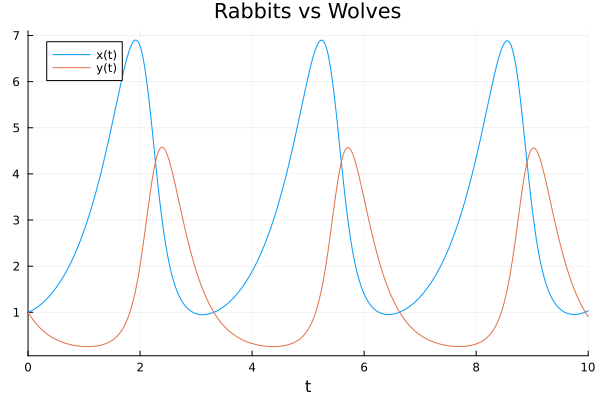

In [29]:
# Plot the solution
p1 = plot(sol, title = "Rabbits vs Wolves")

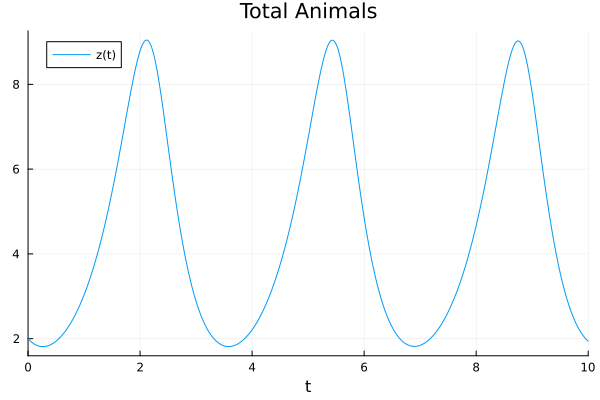

In [30]:
p2 = plot(sol, idxs = z, title = "Total Animals")